# Exercise 1

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline.
Twitter data was scraped from February of 2015 and contributors were
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [92]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [93]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [94]:
tweets['airline_sentiment'].value_counts()

,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


### Proportion of tweets per airline


In [95]:
tweets['airline'].value_counts()

,count
airline,
United,3822
US Airways,2913
American,2759
Southwest,2420
Delta,2222
Virgin America,504


<Axes: xlabel='airline'>

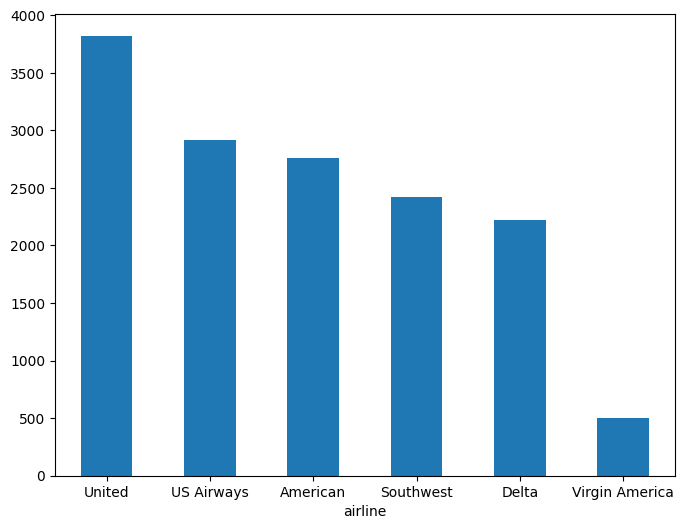

In [96]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

<Axes: title={'center': 'Sentiment by airline'}, xlabel='airline'>

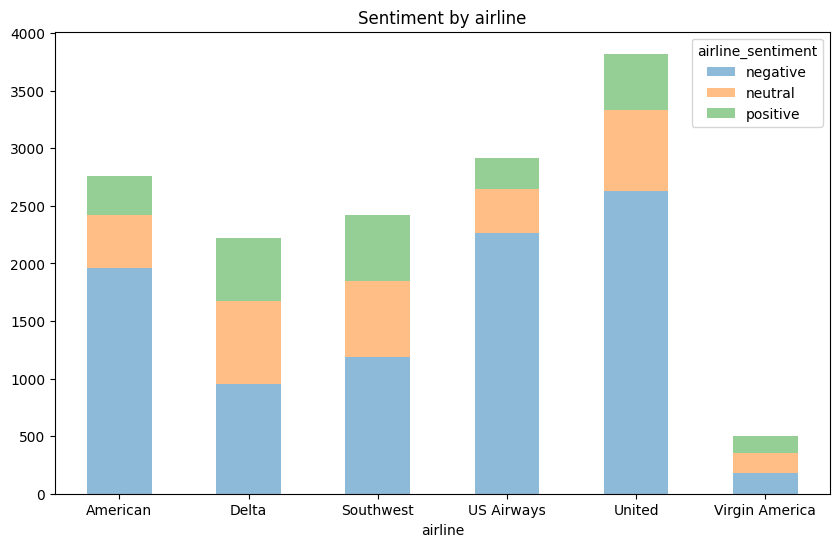

In [97]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 1.1

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [98]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [99]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [100]:
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)

In [101]:
X_dtm

<14640x15051 sparse matrix of type '<class 'numpy.int64'>'
	with 234281 stored elements in Compressed Sparse Row format>

In [102]:
# Convertir a matriz densa
X_dtm.todense()


matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [103]:
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)
X_dtm.shape

(14640, 15051)

In [104]:
X_dtm.todense()[0].argmax()

4804

In [105]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.3, random_state=42)


In [106]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [107]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7748178506375227

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.78      0.96      0.86      2814
     neutral       0.69      0.41      0.51       884
    positive       0.86      0.48      0.61       694

    accuracy                           0.77      4392
   macro avg       0.78      0.62      0.66      4392
weighted avg       0.77      0.77      0.75      4392



# Exercise 1.2

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [108]:
vect = CountVectorizer(stop_words='english')
X_dtm = vect.fit_transform(X)
X_dtm.shape

(14640, 14770)

In [109]:
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [110]:
y_pred = clf2.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7748178506375227

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.78      0.96      0.86      2814
     neutral       0.69      0.41      0.51       884
    positive       0.86      0.48      0.61       694

    accuracy                           0.77      4392
   macro avg       0.78      0.62      0.66      4392
weighted avg       0.77      0.77      0.75      4392



# Exercise 1.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

Con stopwords

In [111]:
vect = CountVectorizer(ngram_range=(1, 4), stop_words=None)  # Omitir stop_words o establecerlo en None
X_dtm = vect.fit_transform(X)
print(X_dtm.shape)


(14640, 483199)


In [112]:
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [113]:
y_pred = clf2.predict(X_test)
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7748178506375227

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.78      0.96      0.86      2814
     neutral       0.69      0.41      0.51       884
    positive       0.86      0.48      0.61       694

    accuracy                           0.77      4392
   macro avg       0.78      0.62      0.66      4392
weighted avg       0.77      0.77      0.75      4392



Variando el npumero de n-grams

In [114]:
vect = CountVectorizer(ngram_range=(1, 2), stop_words=None)
X_dtm = vect.fit_transform(X)
X_dtm.shape

(14640, 117630)

In [115]:
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [116]:
y_pred = clf2.predict(X_test)
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7748178506375227

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.78      0.96      0.86      2814
     neutral       0.69      0.41      0.51       884
    positive       0.86      0.48      0.61       694

    accuracy                           0.77      4392
   macro avg       0.78      0.62      0.66      4392
weighted avg       0.77      0.77      0.75      4392



Sin stopwords

In [117]:
vect = CountVectorizer(ngram_range=(1, 4), stop_words='english')
X_dtm = vect.fit_transform(X)
print(X_dtm.shape)

(14640, 292363)


In [118]:
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [119]:
y_pred = clf2.predict(X_test)
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7748178506375227

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.78      0.96      0.86      2814
     neutral       0.69      0.41      0.51       884
    positive       0.86      0.48      0.61       694

    accuracy                           0.77      4392
   macro avg       0.78      0.62      0.66      4392
weighted avg       0.77      0.77      0.75      4392



In [120]:
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X_dtm = vect.fit_transform(X)
print(X_dtm.shape)

(14640, 100073)


In [121]:
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [122]:
y_pred = clf2.predict(X_test)
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7748178506375227

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.78      0.96      0.86      2814
     neutral       0.69      0.41      0.51       884
    positive       0.86      0.48      0.61       694

    accuracy                           0.77      4392
   macro avg       0.78      0.62      0.66      4392
weighted avg       0.77      0.77      0.75      4392



# Exercise 1.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

# **Exercise 1.1**
Predict the sentiment using CountVectorizer

use Random Forest classifier

In [135]:
tweets = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Tweets.zip', index_col=0)

In [136]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [137]:
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.3, random_state=42)

In [139]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [140]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7748178506375227

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.78      0.96      0.86      2814
     neutral       0.69      0.41      0.51       884
    positive       0.86      0.48      0.61       694

    accuracy                           0.77      4392
   macro avg       0.78      0.62      0.66      4392
weighted avg       0.77      0.77      0.75      4392



# **Exercise 1.2**
Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [141]:
tweets = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Tweets.zip', index_col=0)

In [142]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [143]:
vect = CountVectorizer(stop_words='english')
X_dtm = vect.fit_transform(X)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.3, random_state=42)

In [145]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [146]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7661657559198543

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.83      0.89      0.86      2814
     neutral       0.57      0.51      0.54       884
    positive       0.72      0.60      0.65       694

    accuracy                           0.77      4392
   macro avg       0.71      0.67      0.68      4392
weighted avg       0.76      0.77      0.76      4392



# **Exercise 1.3**
Increase n_grams size (with and without stopwords), then predict the sentiment using CountVectorizer

use Random Forest classifier

**n_grams 1-2 without stopwords**

In [147]:
tweets = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Tweets.zip', index_col=0)

In [148]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [149]:
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X_dtm = vect.fit_transform(X)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.3, random_state=42)

In [151]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [152]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7638888888888888

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.81      0.90      0.86      2814
     neutral       0.57      0.46      0.51       884
    positive       0.74      0.59      0.66       694

    accuracy                           0.76      4392
   macro avg       0.71      0.65      0.67      4392
weighted avg       0.75      0.76      0.75      4392



**n_grams 1-4 without stopwords**

In [153]:
tweets = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Tweets.zip', index_col=0)

In [154]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [155]:
vect = CountVectorizer(ngram_range=(1, 4), stop_words='english')
X_dtm = vect.fit_transform(X)

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.3, random_state=42)

In [157]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [158]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7616120218579235

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.81      0.91      0.85      2814
     neutral       0.57      0.46      0.51       884
    positive       0.75      0.56      0.64       694

    accuracy                           0.76      4392
   macro avg       0.71      0.64      0.67      4392
weighted avg       0.75      0.76      0.75      4392



**n_grams 1-2 with stopwords**

In [159]:
tweets = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Tweets.zip', index_col=0)

In [160]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [161]:
vect = CountVectorizer(ngram_range=(1, 2))
X_dtm = vect.fit_transform(X)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.3, random_state=42)

In [163]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [164]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7700364298724954

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.77      0.97      0.86      2814
     neutral       0.69      0.38      0.49       884
    positive       0.84      0.47      0.61       694

    accuracy                           0.77      4392
   macro avg       0.77      0.61      0.65      4392
weighted avg       0.77      0.77      0.74      4392



**n_grams 1-4 with stopwords**

In [165]:
tweets = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Tweets.zip', index_col=0)

In [166]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [167]:
vect = CountVectorizer(ngram_range=(1, 4))
X_dtm = vect.fit_transform(X)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.3, random_state=42)

In [169]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [170]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7572859744990893

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.76      0.97      0.85      2814
     neutral       0.69      0.36      0.47       884
    positive       0.88      0.40      0.55       694

    accuracy                           0.76      4392
   macro avg       0.77      0.58      0.62      4392
weighted avg       0.76      0.76      0.73      4392

